## AID 데이터로더 이미지 출력 테스트

In [15]:
# 모듈 임포트 경로 추가
import sys, os
sys.path.append(os.path.abspath(".."))

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from src.datasets import load_aid_dataset

dataset_root=os.path.join("..", "AID-dataset")

config = dict(
    root=dataset_root,
    zoom_factor=4,
    output_size=(600, 600),
    chip_size=(300, 300),
    chip_stride=(300, 300),
    batch_size=8,
    normalize_lr=True,
    normalize_hr=True,
    shuffle=False,
    randomly_rotate_and_flip_images=False,
    data_split_seed=42,
    subset_train=None,
    num_workers=0,
)

dataloaders = load_aid_dataset(**config)
val_dataloader = dataloaders["val"] # train, val, test
val_dataset = dataloaders["val"].dataset

print("--------------------------------")
print(f'lr shape: {val_dataset[0]["lr"].shape}') # 0번 샘플의 LR 이미지 크기
print(f'lr dtype: {val_dataset[0]["lr"].dtype}')
print(f'hr shape: {val_dataset[0]["hr"].shape}') # 0번 샘플의 HR 이미지 크기
print(f'hr dtype: {val_dataset[0]["hr"].dtype}')
print("--------------------------------")

for i, batch in enumerate(val_dataloader):
    if i == 1:
        break

    print(f'batched lr shape: {batch["lr"].shape}')
    print(f'batched hr shape: {batch["hr"].shape}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
train_lr dataset path: ../AID-dataset/train/LR_x4
train_hr dataset path: ../AID-dataset/train/HR
val_lr dataset path: ../AID-dataset/val/LR_x4
val_hr dataset path: ../AID-dataset/val/HR
test_lr dataset path: ../AID-dataset/test/LR_x4
test_hr dataset path: ../AID-dataset/test/HR
Train set size: 31400
Val set size: 600
Test set size: 8000
--------------------------------
lr shape: torch.Size([3, 75, 75])
lr dtype: torch.float32
hr shape: torch.Size([3, 300, 300])
hr dtype: torch.float32
--------------------------------
batched lr shape: torch.Size([8, 3, 75, 75])
batched hr shape: torch.Size([8, 3, 300, 300])


## 데이터 시각화

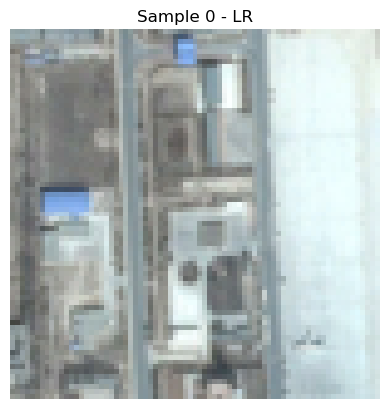

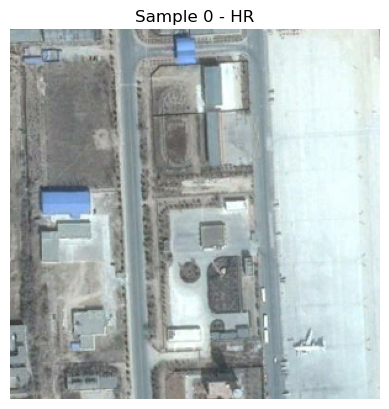

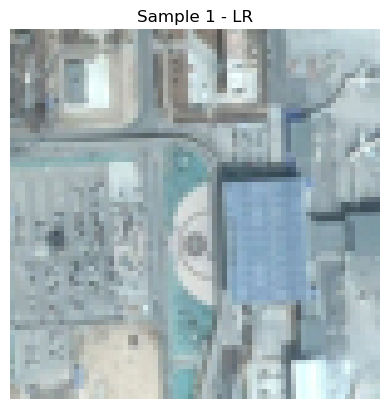

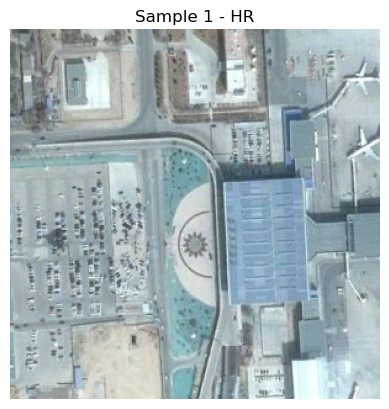

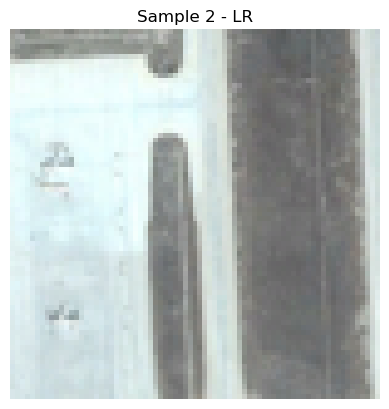

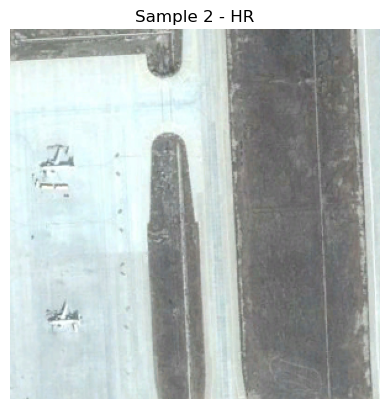

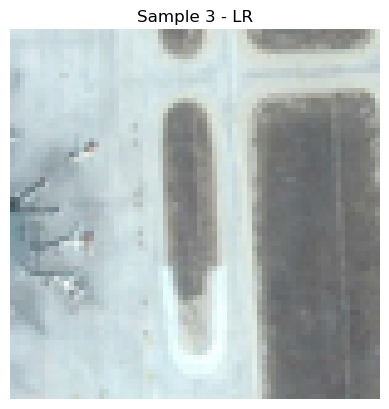

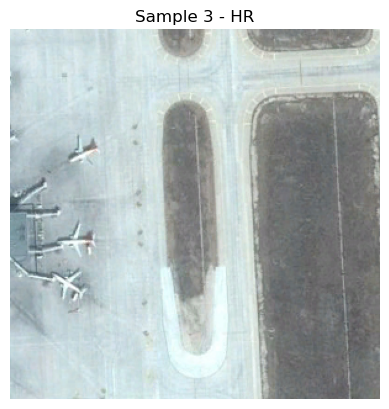

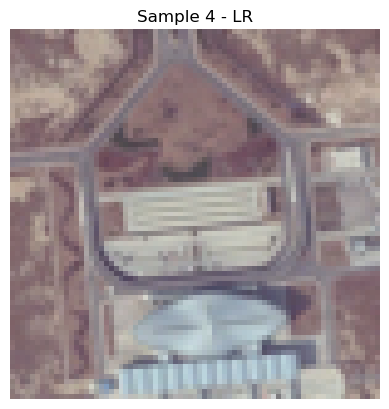

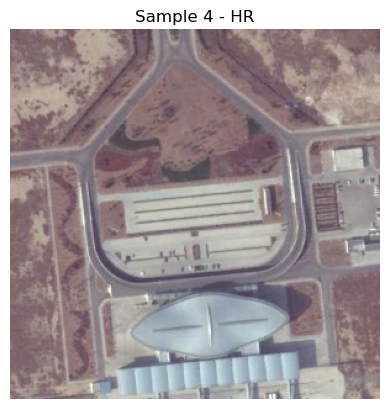

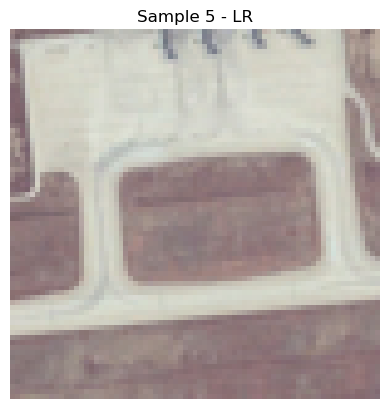

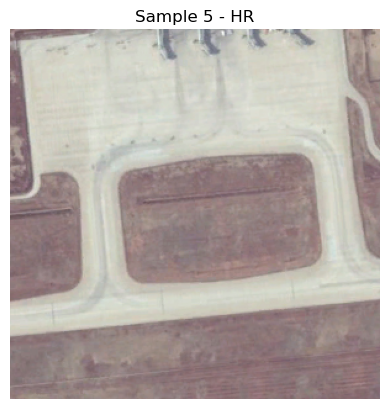

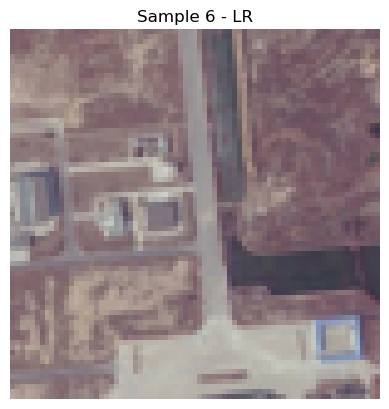

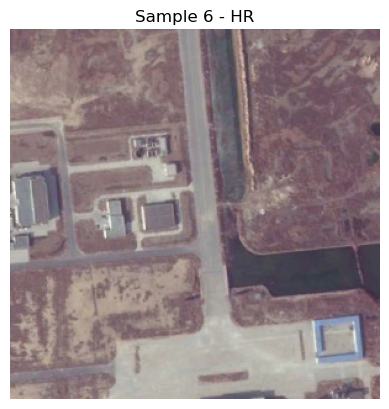

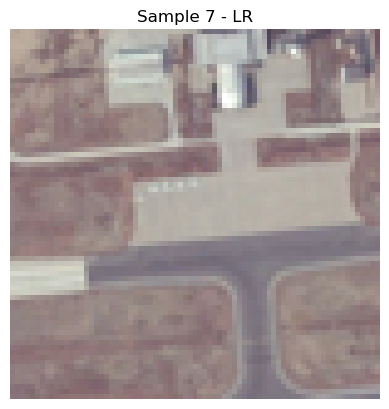

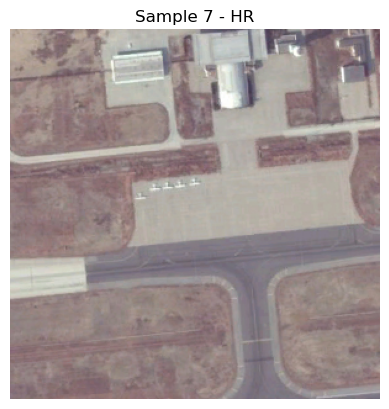

In [27]:
# 첫 번째 배치 가져오기
batch = next(iter(val_dataloader)) # 셔플 방지로 val 데이터셋 사용
num_samples = batch["lr"].shape[0]

for i in range(num_samples):
    # 각 이미지 가져오기 (C, H, W) → (H, W, C)
    lr_img = batch["lr"][i].numpy().transpose(1, 2, 0)
    hr_img = batch["hr"][i].numpy().transpose(1, 2, 0)

    # LR 이미지 출력
    plt.figure()
    plt.imshow(lr_img)
    plt.title(f"Sample {i} - LR")
    plt.axis('off')
    plt.show()

    # HR 이미지 출력
    plt.figure()
    plt.imshow(hr_img)
    plt.title(f"Sample {i} - HR")
    plt.axis('off')
    plt.show()